# Medical Insurance Analysis
## Introduction

In this project, I analyze a medical insurance dataset to uncover insights about various factors influencing insurance charges. The dataset includes demographic details such as age, sex, BMI, number of children, smoking status, and region, along with the insurance charges for individuals. Through exploratory data analysis (EDA), I identify trends, distributions, and correlations between these factors.


## Setup
Import necessary packages and load data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
insurance_data  = pd.read_csv("insurance.csv")
display(insurance_data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understanding the data
Check for any missing values and duplicate rows

In [153]:
duplicates = insurance_data.duplicated().sum()
print(f'\nNumber of duplicate rows: {duplicates}')


Number of duplicate rows: 1


In [155]:
insurance_data[insurance_data.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


The duplicated value could be that two individuals have similar data, therefore I will not remove it.

In [157]:
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No missing values in the dataset

In [159]:
print(insurance_data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Exploratory Data Analysis
Univariate Analysis

What is the distribution of insurance charges?

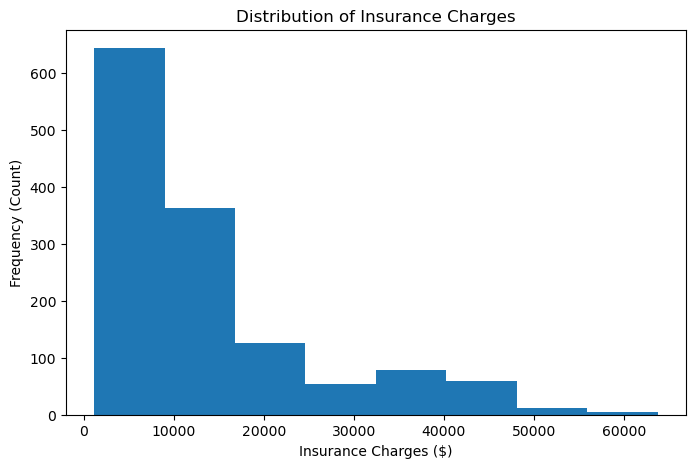

In [161]:
plt.figure(figsize = (8,5))
plt.hist(insurance_data.charges, bins = 8)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges ($)')
plt.ylabel('Frequency (Count)')

plt.show()

A majority of the patients in the dataset have insurance charges of between 1,000  to 10,000 USD while very few have insurance costs of upto 50,000 to 60,000 USD

What is the distribution of age?

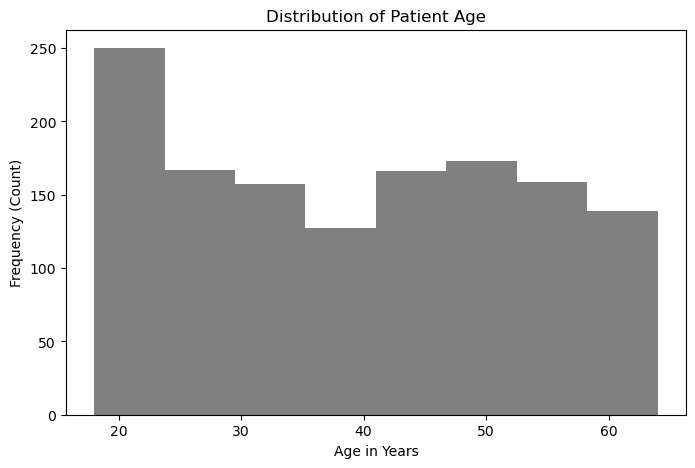

In [163]:
plt.figure(figsize = (8,5))
plt.hist(insurance_data.age, bins = 8, color = 'grey')
plt.title('Distribution of Patient Age')
plt.xlabel('Age in Years')
plt.ylabel('Frequency (Count)')

plt.show()

Patients between the ages of 18-20 are the majority while patients aged 35-40 are the least.

What is the distribution of patient BMI?

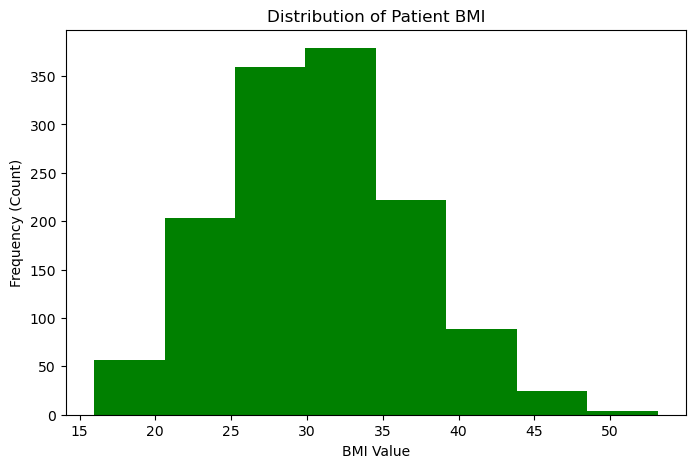

In [165]:
plt.figure(figsize = (8,5))
plt.hist(insurance_data.bmi, bins = 8, color = 'green')
plt.title('Distribution of Patient BMI')
plt.xlabel('BMI Value')
plt.ylabel('Frequency (Count)')

plt.show()

Most of the patients in the dataset have a BMI of between 30-35 while very few have a BMI of 15-20 and 45-50.

Categorical Variable Distribution - sex, smoker status, region and number of children

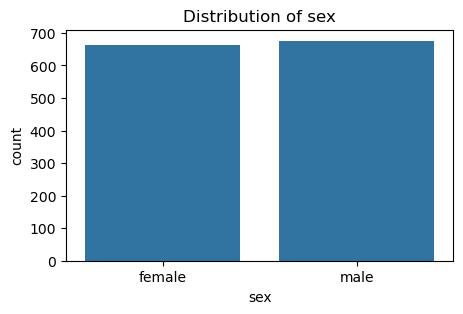

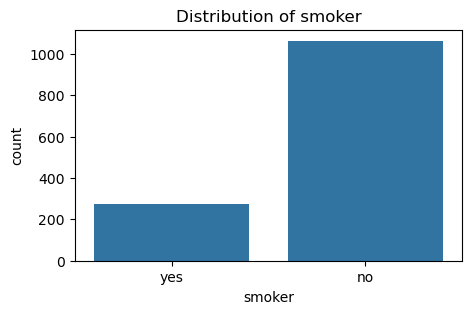

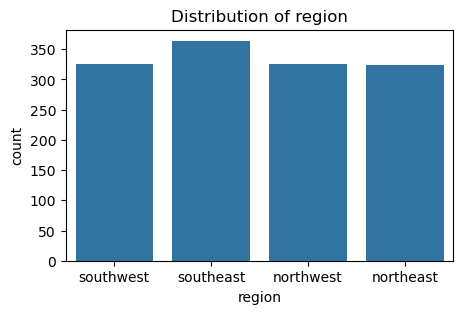

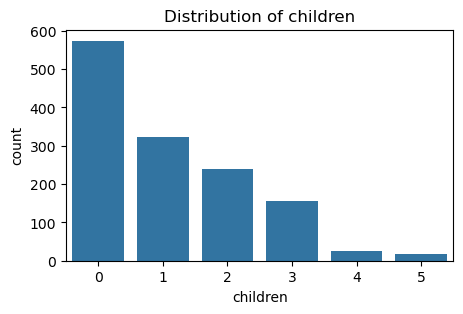

In [167]:
# Countplots for categorical variables
categorical_features = ['sex', 'smoker', 'region', 'children']
for feature in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=insurance_data[feature])
    plt.title(f"Distribution of {feature}")
    plt.show()


There are more male patients in the dataset compared to female patients, however the difference is not that significant. Most patients hail from the southeast and same number of patients are from the northwest, northeast and southwest regions.

## Bivariate Analysis

How does age, smoking, BMI, gender and number of children relate to insurance charges?

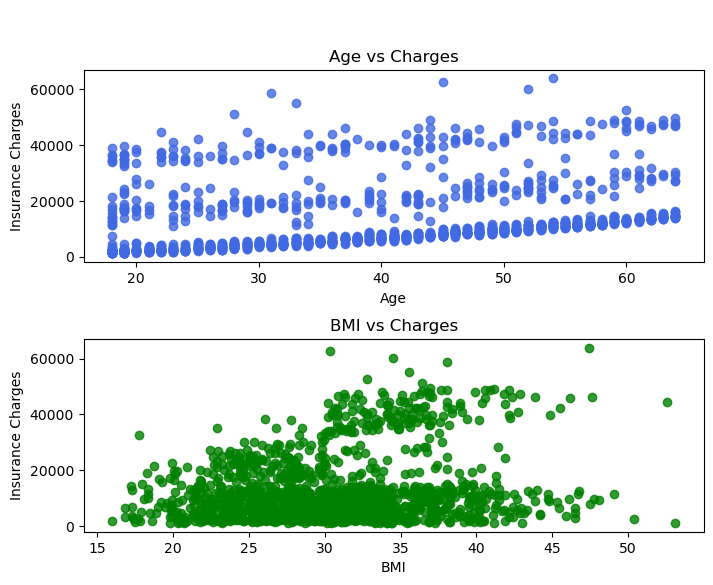

In [171]:
# Create figure
fig = plt.figure(figsize=(8, 6))
plt.suptitle('Factors Affecting Insurance Charges', fontsize=14, color='white')

# Scatterplot: Age vs Charges
plt.subplot(2, 1, 1)
plt.scatter(x=insurance_data.age, y=insurance_data.charges, color='royalblue', alpha=0.8)
plt.title('Age vs Charges')
plt.xlabel("Age")
plt.ylabel("Insurance Charges")

plt.subplot(2, 1, 2)
plt.scatter(x=insurance_data.bmi, y=insurance_data.charges, color='green', alpha=0.8)
plt.title('BMI vs Charges')
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")

plt.subplots_adjust(hspace=0.4) 
plt.show()

Graph A above shows a positive correlation between older patients and higher insurance costs while Graph B shows a positive correlation between higher BMI and higher insurance costs.

Boxplots to show relationship between Smoker Status and Gender and Inusrance Charges

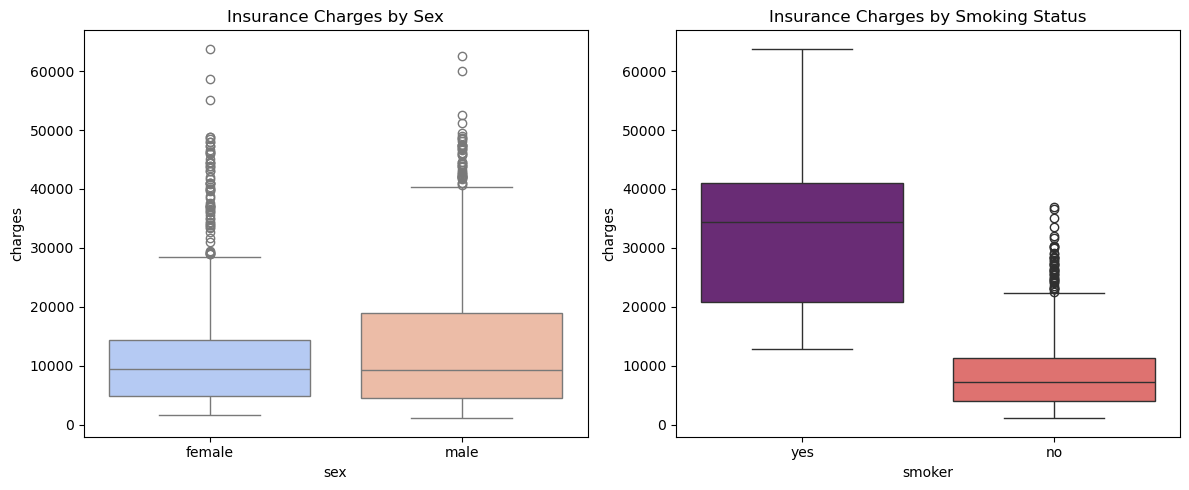

In [173]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot: Sex vs Charges
sns.boxplot(x="sex", y="charges", data=insurance_data, hue="sex", palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("Insurance Charges by Sex")

# Boxplot: Smoker vs Charges
sns.boxplot(x="smoker", y="charges", data=insurance_data, hue="smoker", palette="magma", legend=False, ax=axes[1])
axes[1].set_title("Insurance Charges by Smoking Status")

plt.tight_layout()
plt.show()



Sex and Insurance Charges: Female and Male patients have a median insurance charge of 10,000 USD, There are outliers in both groups however there are more among female patients (extremely high charges). Male patients have a high max value of insurance charges ($40,000) compared to maximum charges of female patients - a little under 30,000 USD. 

Smoker Status and Insurance Charges : Patients who smoke have significantly higher insurance charges compared to those who don't smoke. The median value of insurance charges for non-smokers is 9000USD, while for smokers is 38,000USD.

Relationship between Number of Children and Insurance Charges

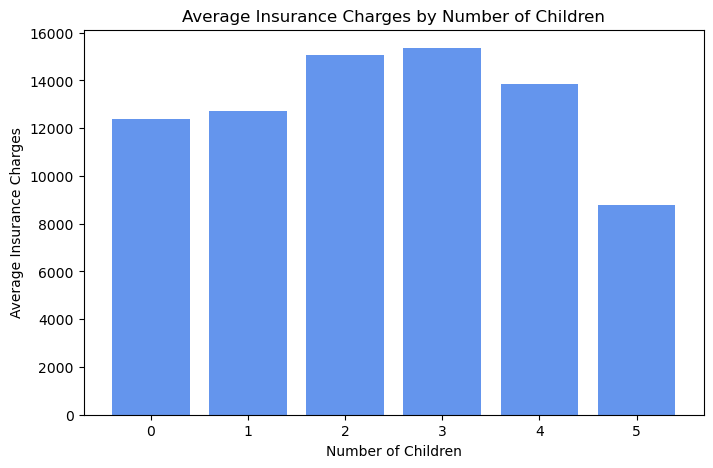

In [141]:
# Compute average charges per number of children
avg_charges = insurance_data.groupby('children')['charges'].mean()

plt.figure(figsize=(8, 5))
plt.bar(x=avg_charges.index, height=avg_charges.values, color="cornflowerblue")

# Labels and title
plt.xlabel("Number of Children")
plt.ylabel("Average Insurance Charges")
plt.title("Average Insurance Charges by Number of Children")
plt.show()


Patients with either 2 or 3 children have higher insurance costs compared to patients with 5 children who have the least insurance costs - probably because they are few.

Relationship between Regions and Insurance Charges of Smokers and Non-Smokers

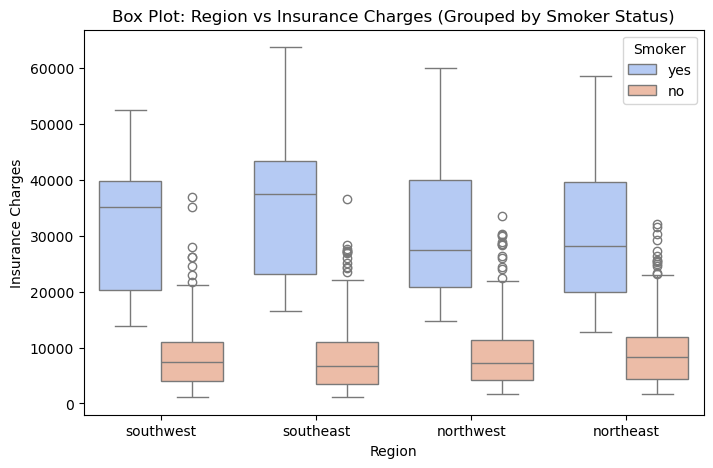

In [179]:

# Create Figure
plt.figure(figsize=(8, 5))
sns.boxplot(x=insurance_data["region"], y=insurance_data["charges"], hue=insurance_data["smoker"], palette="coolwarm")

plt.xlabel("Region")
plt.ylabel("Insurance Charges")
plt.title("Box Plot: Region vs Insurance Charges (Grouped by Smoker Status)")

# Add legend
plt.legend(title="Smoker", loc="upper right")
plt.show()



Regions and Smoker Status:

Regions and Insurance Charges

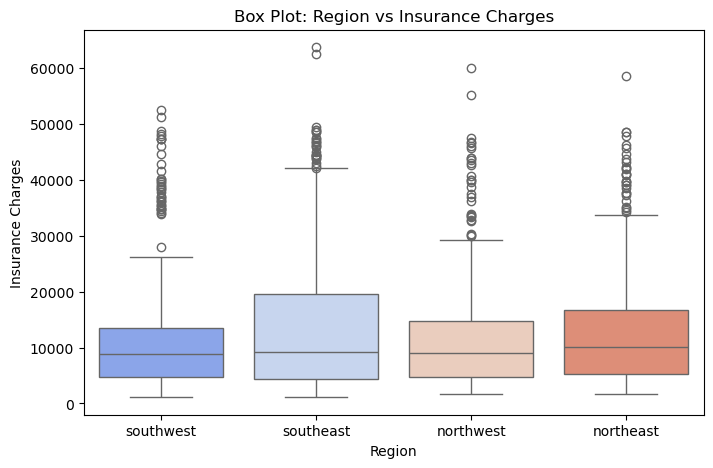

In [193]:
# Create Figure
plt.figure(figsize=(8, 5))
sns.boxplot(x="region", y="charges", data=insurance_data, hue="region", legend=False, palette="coolwarm")

plt.xlabel("Region")
plt.ylabel("Insurance Charges")
plt.title("Box Plot: Region vs Insurance Charges")

plt.show()



Interpretation : There is more variation in insurance charges in the southeast region compared to other regions. Many high outliers suggest that certain individuals in the regions have extremely high insurance costs (e.g., due to smoking, obesity, or medical conditions).